# Exploratory Data Analysis

### Table of Content

1. Introduction


2. Univariate Analysis


3. Bivariate Analysis


4. Multivariate Analysis


5. Conclusion

## 1. Introduction

The aim is to analyze the loan application data of customers to see which feature is highly related to Loan Status(CPL_Status) 
which is our target feature. 

We will be doing various analysis like univariate, bivariate and multivariate to see the relationship between the features at maximum level.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
#load data
df=pd.read_excel("df_EDA.xlsx")

In [3]:
#first five rows
df.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
0,M,N,0,Grad,N,153.6,360,1,Urban,Y,7018.8
1,M,Y,1,Grad,N,153.6,360,1,Rural,N,7309.2
2,M,Y,0,Grad,Y,79.2,360,1,Urban,Y,3600.0
3,M,Y,0,Non Grad,N,144.0,360,1,Urban,Y,5929.2
4,M,N,0,Grad,N,169.2,360,1,Urban,Y,7200.0


## 2. Univariate Analysis

#### Feature Name: Sex

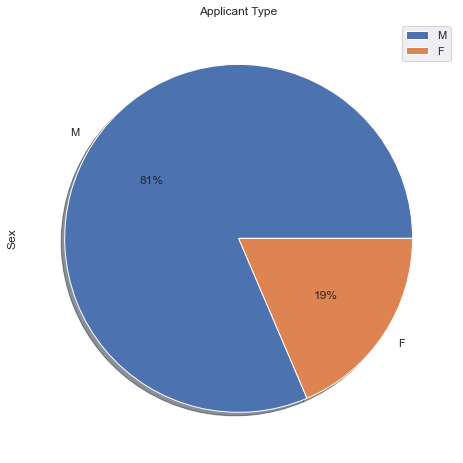

In [4]:
#pie chart for categorical data
df['Sex'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.0f%%',shadow=True, legend=True,title='Applicant Type')

####  Analysis:

The majority Consumer category is Male for personal loan. Around 20 percent of total applicants are female only. 

#### Feature Name: Marital Status

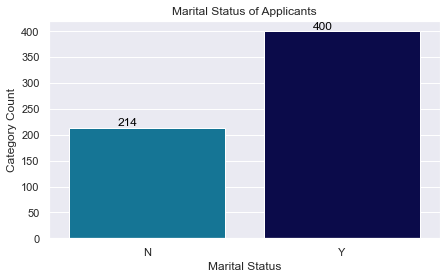

In [5]:
#count plot for categorical to count the frequency
plt.figure(figsize=(7,4))
graph = sns.countplot(x='Marital_Status', data = df,palette='ocean_r')
#to print the count on the top of the graph
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.xlabel('Marital Status')
plt.ylabel("Category Count")
plt.title('Marital Status of Applicants')
plt.show()

#### Analysis:

Out of 614 applicants One third Consumers are unmarried. We will see relationship between Marital Status with other features in bivariate analysis. On this note we can say married people need more loan than unmarried ones.

#### Feature Name: Qualification

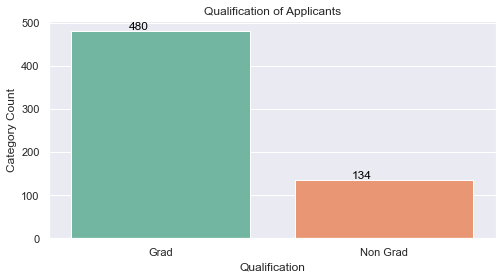

In [6]:
#categorical
plt.figure(figsize=(8,4))
graph=sns.countplot(x='Qual_var',data=df,palette='Set2')
#to count the freuency and print over the graph
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.xlabel('Qualification')
plt.ylabel("Category Count")
plt.title('Qualification of Applicants')
plt.show()

#### Ananlysis:

The qualification matters or not while granting the loan, We will see in bivariate analysis with CPL Status variable. For this plot majority(around 80 percent) consumers have done graduation.

#### Feature Name:Self Employed(SE)

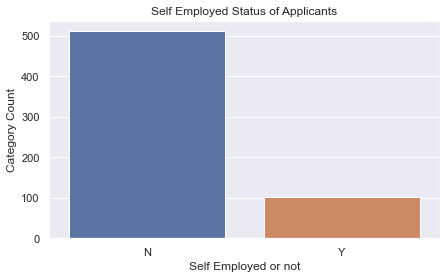

In [30]:
#self employed
plt.figure(figsize=(7,4))
sns.countplot(x='SE',data=df)
plt.xlabel('Self Employed or not')
plt.ylabel("Category Count")
plt.title('Self Employed Status of Applicants')
plt.show()

#### Analysis:

Self Employement is basically a business owned by an individual.Here we can see that only 100 people(1/6th of total population) seek loan who are self employed and rest work in any firm or get a monthly salary.Bank grant loan those have lower risk of borrower default.

Government Employees are the best customers for banks to grant a loan. But this is not the only case we will consider other factors affect the process as well and we will see while analysing other variables.


#### Feature Name: Prop Area

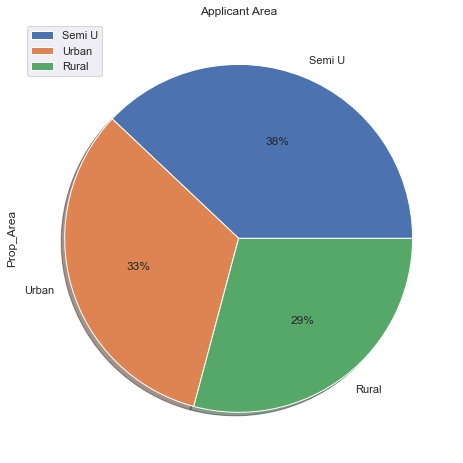

In [8]:
#pie chart for categorical data
df['Prop_Area'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.0f%%',shadow=True, legend=True,title='Applicant Area')

#### Analysis:

Most applicants are from Semi Urban area. The relationship between Area and other features like Self Employement and Total Income will draft better intuition regarding the loan status. 

#### Feature Name:Dependents

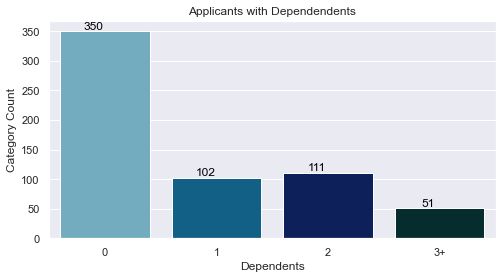

In [9]:
#count plot for categorical data
plt.figure(figsize=(8,4))
ax=sns.countplot(x='Dependents',data=df,palette='ocean_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.xlabel('Dependents')
plt.ylabel("Category Count")
plt.title('Applicants with Dependendents')
plt.show()

#### Analysis:

Dependents are those who are directly depend on applicant. Those can be spouse or children only where parents are not included.
Less Dependent will have lower risk of default, means applicant can easily submit their EMIs.

#### Feature Name: CPL Amount

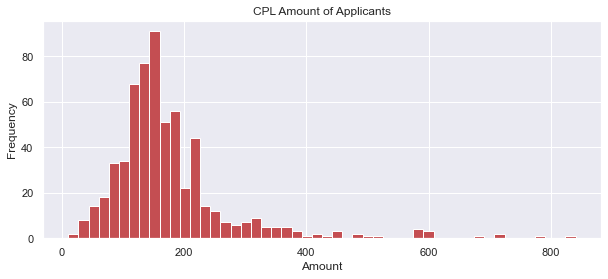

In [10]:
#histogram for continuous data
plt.figure(figsize=(10,4))
df['CPL_Amount'].plot(kind='hist',bins=50,color='r')
plt.xlabel('Amount')
plt.title('CPL Amount of Applicants')
plt.show()

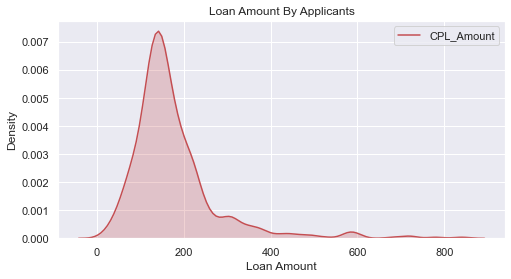

In [11]:
#density plot can also be used for continuous data
plt.figure(figsize=(8,4))
sns.kdeplot(df['CPL_Amount'],shade=True, color='r')
plt.title("Loan Amount By Applicants")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

#### Analysis:

Consumer Personal Loan Amount is basically the loan amount to be granted by bank to the applicant. The unit to be considered in rupee(As per direction of data provider).
The amount to be considered in thousands.
We can see that most of the applicants seek loan less than 2.5 lakhs or (250 thousand). 

#### Feature Name: CPL Term

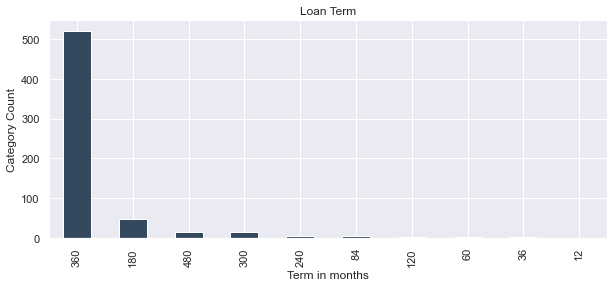

In [31]:
#bar plot 
plt.figure(figsize=(10,4))
df['CPL_Term'].value_counts().plot(kind='bar',color='#34495e')
plt.xlabel('Term in months')
plt.ylabel("Category Count")
plt.title('Loan Term')
plt.show()

#### Analysis:

Consumer Personal Loan Term is something for how long an individual is seeking the loan or the duration of loan.
The above data has the duration in months
If we divide the months by 12, will get proper year of duartion.

#### Feature Name: Credit History

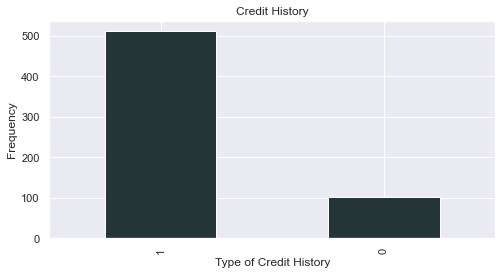

In [13]:
#barplot
plt.figure(figsize=(8,4))
df['Credit_His'].value_counts().plot(kind='bar',color='#243636')
plt.title("Credit History")
plt.xlabel("Type of Credit History")
plt.ylabel("Frequency")
plt.show()

#### Analysis:

Credit History is very important feature for banks to lend a loan.
if Credit history is 0 means it has very high default risk and if it is 1, there is very low default risk.

## 3. Bivatiate Analysis

Our focus is to relate every feature to the CPL_Status.We ll be analyzing all features with CPL_Status only. If necessary other combinations can be visualized as well

In [14]:
df.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
0,M,N,0,Grad,N,153.6,360,1,Urban,Y,7018.8
1,M,Y,1,Grad,N,153.6,360,1,Rural,N,7309.2
2,M,Y,0,Grad,Y,79.2,360,1,Urban,Y,3600.0
3,M,Y,0,Non Grad,N,144.0,360,1,Urban,Y,5929.2
4,M,N,0,Grad,N,169.2,360,1,Urban,Y,7200.0


##### Feature Name: Sex Vs Loan Status(CPL_Status)

Text(0, 0.5, 'Frequency')

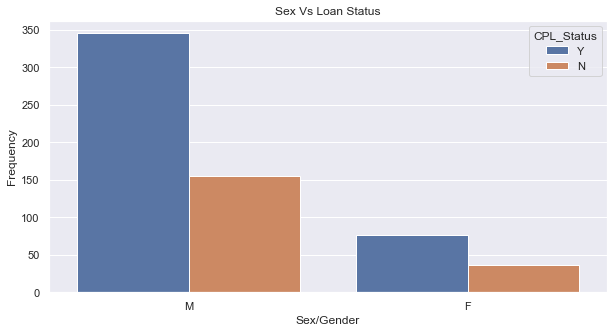

In [15]:
#plot countplot and use hue parameter to bring the second feature in the picture
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x='Sex',hue='CPL_Status',data=df)
ax.set_title('Sex Vs Loan Status')
ax.set_xlabel('Sex/Gender')
ax.set_ylabel('Frequency')

##### Analysis:

In the process of loan gender does not matter that much. Here as well, same proportion of male and female category is accepted and rejected for loan.

Further analysis we would be independent of 'Sex'.

##### Feature Name:Prop_Area Vs Loan Status(CPL_Status)

Text(0, 0.5, 'Frequency')

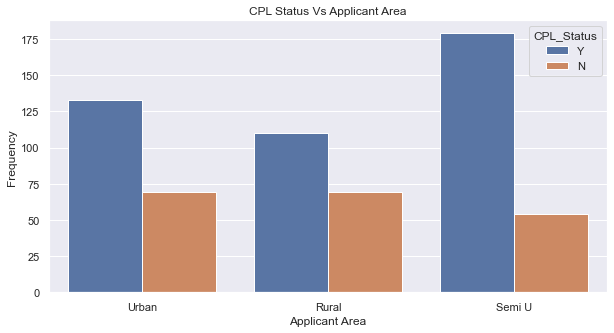

In [16]:
#plot countplot and use hue parameter to bring the second feature in the picture
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x='Prop_Area',hue='CPL_Status',data=df)
ax.set_title('CPL Status Vs Applicant Area')
ax.set_xlabel('Applicant Area')
ax.set_ylabel('Frequency')

##### Analysis:

Semi Urban has most applicants so that it is obvious that its count for acceptance would be more than others. But when we see rejection of applications semi urban has less as compared to other areas and hence if you are from Semi Urban area the probability of getting loan is high.
Interesting point is that the Urban and Rural applications are rejected equally although urban applicants are more than rural.
 We would see other factors affecting the trend in the multivariate analysis.

##### Feature Name: Dependents Vs Loan Status

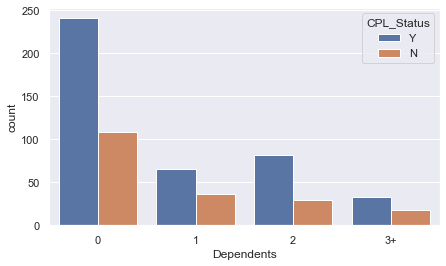

In [17]:
#plot countplot and use hue parameter to bring the second feature in the picture
plt.figure(figsize=(7,4))
sns.countplot(x='Dependents',data=df,hue='CPL_Status')

##### Analysis:

"Having dependents means you have higher commitments, which in turn lower your disposable income."
Lesser the number of dependents higher is the possibility of getting loan. Although we can see applicants having 0 dependents are rejected as well. This is due to some other factors affecting the process.

#### Feature Name:Credit History Vs Loan Status

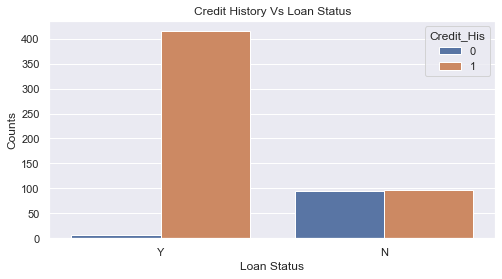

In [18]:
#plot countplot and use hue parameter to bring the second feature in the picture
plt.figure(figsize=(8,4))
sns.countplot(x='CPL_Status',data=df,hue='Credit_His')
plt.title("Credit History Vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Counts")
plt.show()

Text(93.5, 0.5, 'Loan Status')

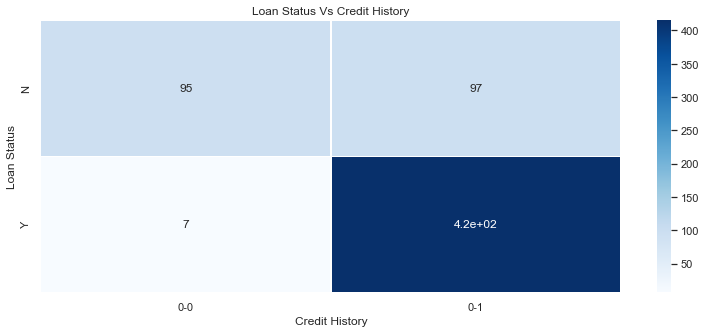

In [19]:
#copy two columns only
df_new=df[['CPL_Status','Credit_His']].copy()
#groupby
df_new=df_new.groupby(['CPL_Status','Credit_His']).size().reset_index()

df_new=df_new.pivot('CPL_Status','Credit_His')
#heatmap to visualize the counts of feature with respect to each other
plt.figure(figsize=(13, 5));
ax=sns.heatmap(df_new,cmap="Blues",linewidths=.5,annot=True)
ax.set_title('Loan Status Vs Credit History')
ax.set_xlabel('Credit History')
ax.set_ylabel('Loan Status')

#### Analysis:

The most important faeture required for personal loan or any kind of laon. Credit history is highly correlated to Status of loan whether he or she is lent or not.
As i mentioned in univariate analysis that 0 means high default risk and 1 means low default risk on the basis of previous loan history
Here out of 512 applicants having 1 credit history 420 are accepted and out of 102 applicants having 0 credit history 95 are rejected. 

#### Feature Name: Loan Status Vs Total Income

Text(0, 0.5, 'Total Income')

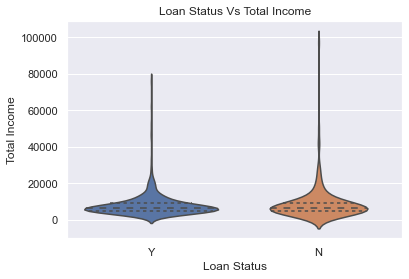

In [20]:
#violin plot is used for one categorical and one continuous data
ax=sns.violinplot(x='CPL_Status',y='Total_Income',data=df,inner='quartile')
ax.set_title('Loan Status Vs Total Income')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Total Income')

#### Analysis:

Income is basic requirement to lend a loan.It assures banks that a person would not default the loan EMIs.But,Here we can see high income is rejected as well.This may be because of credit history risk or other factors like having more dependents, term of loan would be for very long duration etc.

##### Feature Name: Loan Status Vs Loan Amount

Text(0, 0.5, 'Loan Amount')

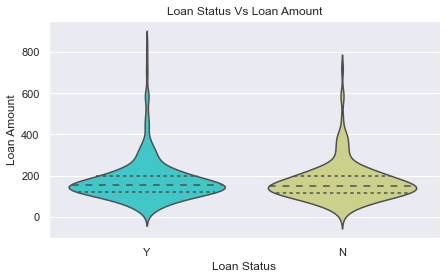

In [21]:
#violin plot is used for one categorical and one continuous data
plt.figure(figsize=(7,4))
ax=sns.violinplot(x='CPL_Status',y='CPL_Amount',data=df,inner="quartile",palette='rainbow')
ax.set_title('Loan Status Vs Loan Amount')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Loan Amount')

#### Analysis:

This is the amount a person seeking as loan. Here, All range of amount has been accepted and rejected as well.

##### Feature Name: Marital Status Vs Loan Status

Text(0, 0.5, 'Frequency')

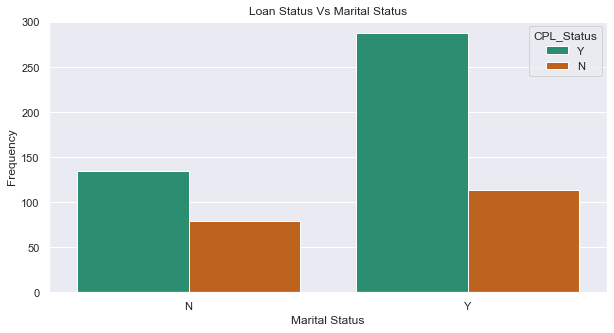

In [22]:
#count plot for two categorical variables
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x='Marital_Status',hue='CPL_Status',data=df,palette='Dark2')
ax.set_title('Loan Status Vs Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Frequency')

#### Analysis:

Married people are more likely get loan than the unmarried ones.

#### Feature Name:Loan Status Vs Qualification

Text(0, 0.5, 'Frequency')

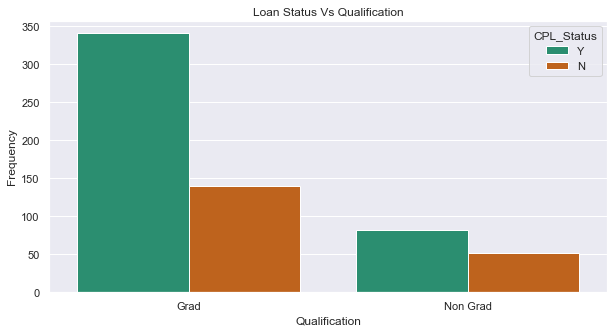

In [23]:
#count plot for two categorical variables
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x='Qual_var',hue='CPL_Status',data=df,palette="Dark2")
ax.set_title('Loan Status Vs Qualification')
ax.set_xlabel('Qualification')
ax.set_ylabel('Frequency')

#### Analysis:

The graduate people are given more preference over non graduates. The proportion of graduates accepted for loan is higher than non graduates.

#### Feature Name: Loan Status Vs Loan Term

Text(0, 0.5, 'Frequency')

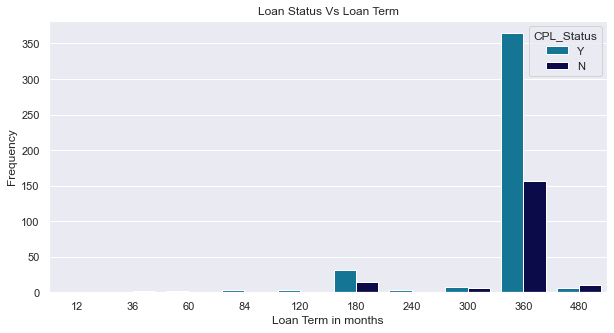

In [32]:
#consider the term as categorical and visualize with the help of countplot
fig, ax = plt.subplots(figsize =(10, 5)) 
ax=sns.countplot(x='CPL_Term',hue='CPL_Status',data=df,palette='ocean_r')
ax.set_title('Loan Status Vs Loan Term')
ax.set_xlabel('Loan Term in months')
ax.set_ylabel('Frequency')

#### Analysis:

The majority of loans are taken for 360 months(30 years). The approval of loan also depends on duration, short term loan are accepted quickly. As we can see loan for 40 years has been rejected often.

## 4. Multivariate Analysis

In [25]:
df.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
0,M,N,0,Grad,N,153.6,360,1,Urban,Y,7018.8
1,M,Y,1,Grad,N,153.6,360,1,Rural,N,7309.2
2,M,Y,0,Grad,Y,79.2,360,1,Urban,Y,3600.0
3,M,Y,0,Non Grad,N,144.0,360,1,Urban,Y,5929.2
4,M,N,0,Grad,N,169.2,360,1,Urban,Y,7200.0


##### Feature Name: Total Income, Loan Amount and Loan Status

Text(0, 0.5, 'Loan Amount')

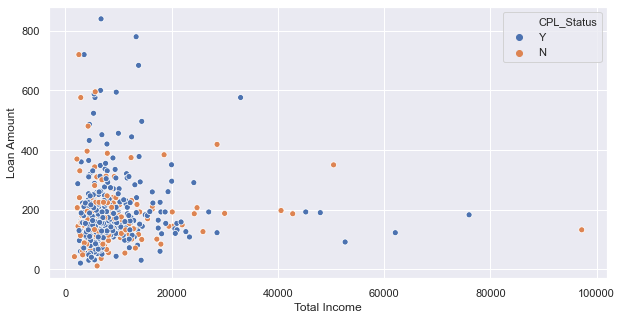

In [26]:
#scatterplot for two continuous and use hue to make another entry of categorical data
plt.figure(figsize=(10,5))
ax=sns.scatterplot(x='Total_Income',y='CPL_Amount',data=df,hue='CPL_Status')
ax.set_xlabel('Total Income')
ax.set_ylabel('Loan Amount')

#### Analysis:

Well we can see the distribution of data points of loan amount and total income with respect to Loan Status. 
We analyzed impact of income and loan amount on loan status in univariate and bivariate analysis.

Here we can see the exact points of loan amount which has been accepted or rejected by bank with respect to income.


#### Feature Name: Applicant Area, Credit History and Loan Status

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


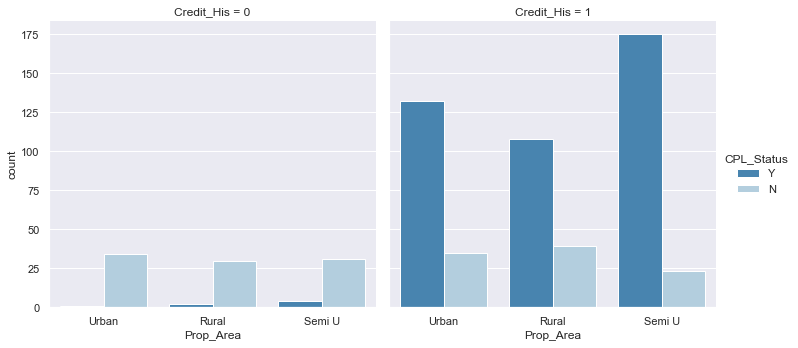

In [27]:
#faceting, visualizing three categorical variables 
sns.factorplot(x="Prop_Area", hue="CPL_Status", col="Credit_His",data=df, kind="count",palette='Blues_r')

#### Analysis:

A very interesting insight comes out of this plot. We analyzed in univariate that credit history matters a lot while applying for laon.

The Semi Urban area has very less probability of rejection if your credit score is 1.
If Your credit score is 0 and you come from any of the areas your application will get rejected but there is little chance of acceptance if you belong to semi urban only.



#### Feature Name: Dependents, Loan Status and Credit History

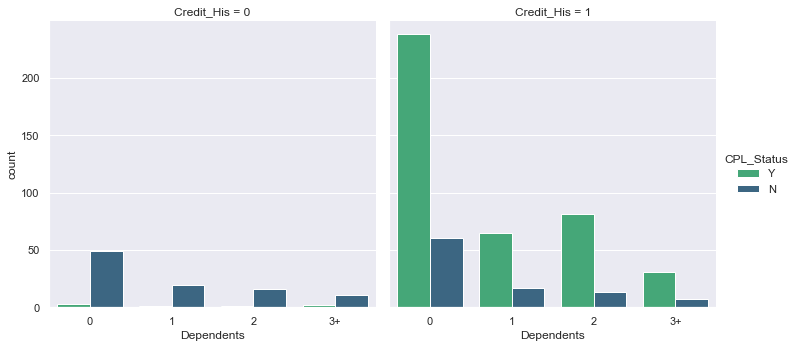

In [28]:
#faceting, visualizing three categorical variables 
sns.factorplot(x="Dependents", hue="CPL_Status", col="Credit_His",data=df, kind="count",palette='viridis_r')

#### Analysis:

We have seen that Credit history is the key to grant a loan. Realting other features with credit history gives another idea of loan process.

If your credit history is 0, I can simply say sorry you are not going to get the loan money from a bank, simple!.

It doesn't matter how less dependents you have, your application would be rejected  if your credit history is 0.
So, if you want loan from bank keep your past track better and be in the safe zone!

#### Feature Name: Self Employeed, Credit History and Loan Status

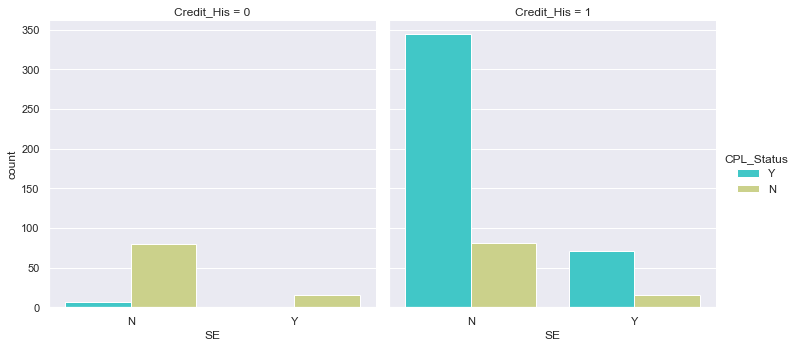

In [29]:
#faceting, visualizing three categorical variables 
sns.factorplot(x="SE", hue="CPL_Status", col="Credit_His",data=df, kind="count",palette='rainbow')

#### Analysis:

So, keep credit history 0 aside as we have better analysis of it. If you are self employed and credit history is 1, probability of approval by bank is very high.

Here we are considering only if you are self employed case.

## 5. Conclusion

The plots I have drawn so far are not only possible combinations of features. But I have gone through the most correlated features while doing bivariate and multivariate analysis.

After each visualization, a conclusion has been drwan for that plot means how it was related to the our target feature "Loan Status(CPL_Status)". The proper visualization for categorical and continuous variables have been used.

The main insight i would like to put here that Credit History is most important attribute for the loan approval. You should be aware of your past default EMIs. If your Credit history is 0 , You are not going to get the loan from bank.

## Reference

https://seaborn.pydata.org/tutorial/categorical.html

https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values